In [2]:
from git_cluster import GIT
import hdbscan
from QuickshiftPP import *
from Spectacl import Spectacl
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import numpy as np
from pydpc import Cluster
from pydpc._reference import Cluster as RefCluster
from Pipeline import DPA

import sys; sys.path.append('../')
from utils import measures_calculator, matchY, autoPlot
from collections import Counter
from dataloaders import Toy_DataLoader as DataLoader

# chainlink

## raw

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

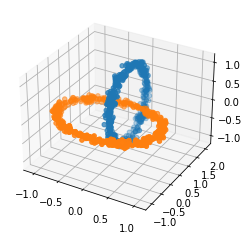

In [7]:
X_raw, Y_raw = DataLoader(name='chainlink', path='../datasets/toy_datasets').load()
X = X_raw
Y_true = Y_raw - 1
autoPlot(X ,Y_true, axis='off', svfile='./figs/raw_data1.png',dpi=100)

## Spectacl

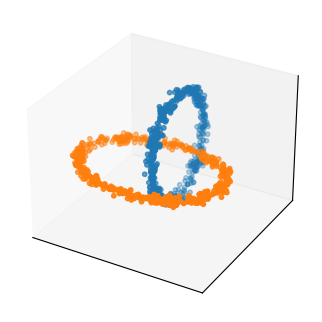

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      2.0

In [54]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=0.5).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
# Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## GIT

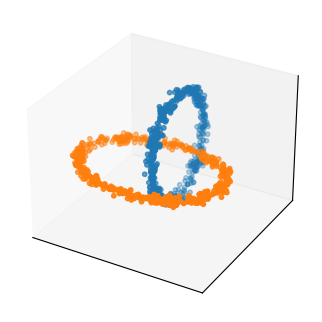

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      2.0

In [55]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=10,
                  target_ratio=[ 1.,  1],
                  plot=False,
                 )
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## QuickshiftPP

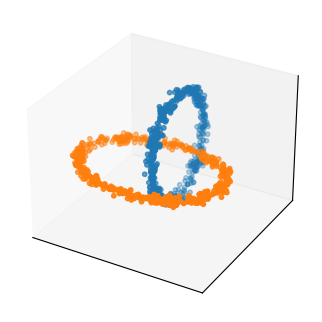

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      2.0

In [56]:
model = QuickshiftPP(k=25,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## HDBSCAN

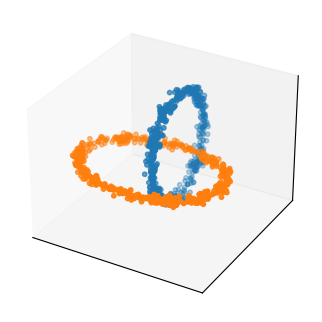

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      2.0

In [57]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=30)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## KMeans

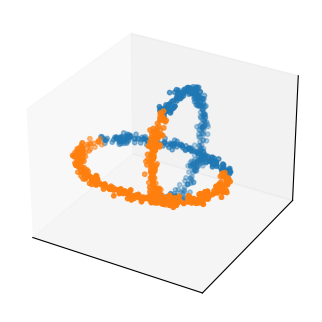

f1       ARI       ACC       NMI  cover_rate  classes
0  0.653346  0.093154  0.653347  0.068956         1.0      2.0

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## SpectralClustering

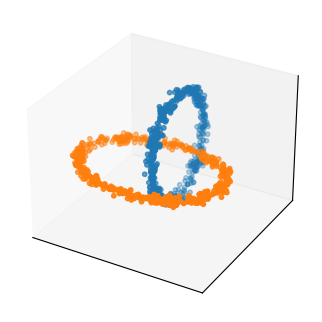

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      2.0

In [59]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        gamma=10,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## pydpc

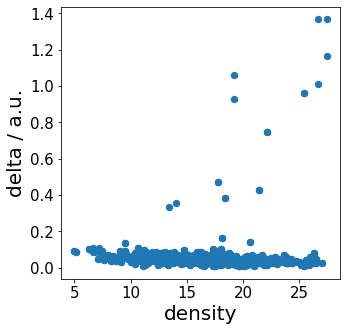

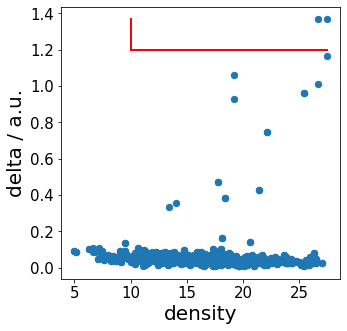

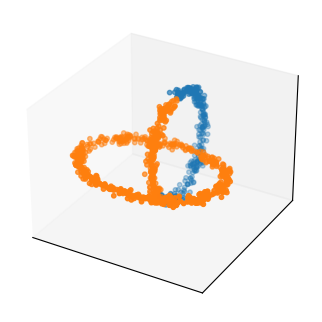

f1      ARI       ACC       NMI  cover_rate  classes
0  0.799707  0.37694  0.807193  0.432659         1.0      2.0

In [61]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(10, 1.2)
Y_pred = clu.membership
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/pydbc1.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## DPA

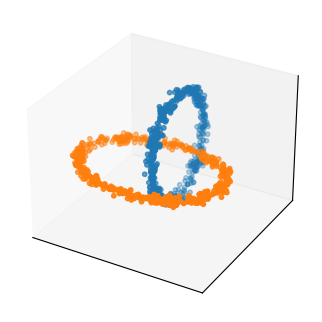

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      2.0

In [62]:
dpa = DPA.DensityPeakAdvanced(Z=10)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true=matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/DPA.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# impossible

## raw

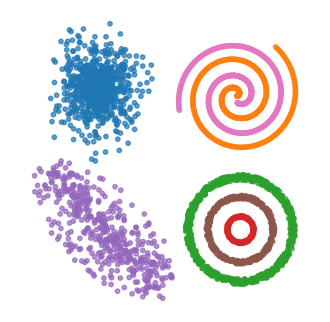

In [29]:
X_raw,Y_raw=DataLoader.load('impossible')
X = X_raw
Y_true = Y_raw
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data2.png',dpi=100)

## Spectacl

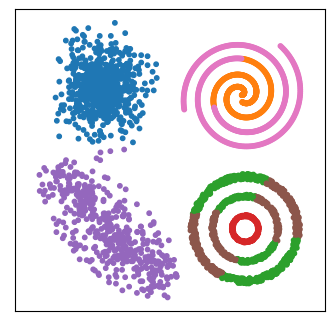

f1      ARI       ACC       NMI  cover_rate  classes
0  0.759454  0.71645  0.757441  0.797891         1.0      7.0

In [65]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=7, epsilon=5).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## GIT

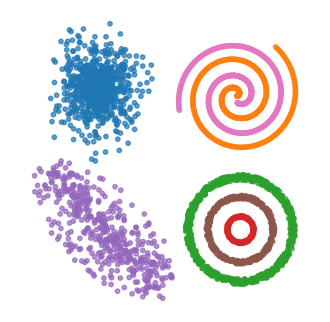

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      7.0

In [30]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=10,
                  target_ratio=[2, 2, 1, 1, 1, 1, 1],
                  plot=False,
                 )
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## QuickshiftPP

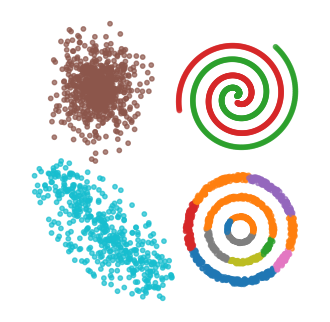

f1       ARI       ACC       NMI  cover_rate  classes
0  0.801706  0.774542  0.788595  0.819231         1.0      8.0

In [31]:
model = QuickshiftPP(k=15,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
# Y_pred, Y_true = matchY(Y_pred,Y_true)
# Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## HDBSCAN

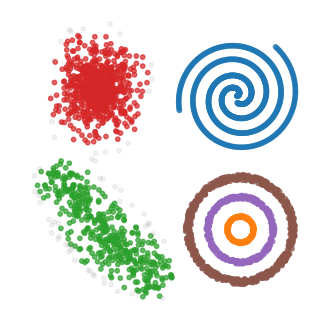

f1       ARI       ACC       NMI  cover_rate  classes
0  0.830365  0.889778  0.872774  0.950814    0.983866      6.0

In [32]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=30)
clusterer.fit(X)
Y_pred=clusterer.labels_
# Y_pred, Y_true = matchY(Y_pred,Y_true)
# Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## KMeans

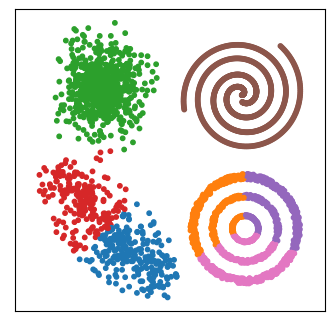

f1       ARI       ACC       NMI  cover_rate  classes
0  0.546263  0.629343  0.562726  0.710696         1.0      7.0

In [69]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
Y_pred = kmeans.labels_
# Y_pred, Y_true = matchY(Y_pred,Y_true)
# Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## SpectralClustering

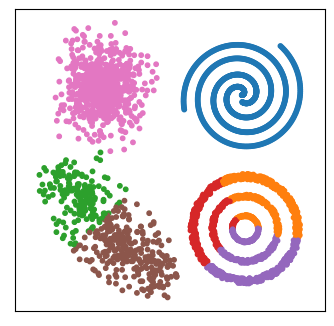

f1       ARI       ACC       NMI  cover_rate  classes
0  0.551977  0.632232  0.570236  0.715496         1.0      7.0

In [71]:
clustering = SpectralClustering(n_clusters=7,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## pydpc

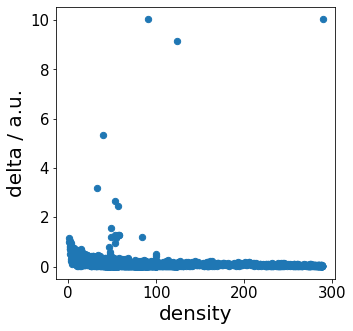

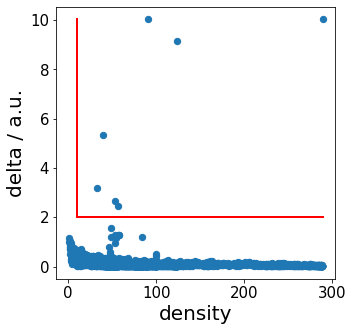

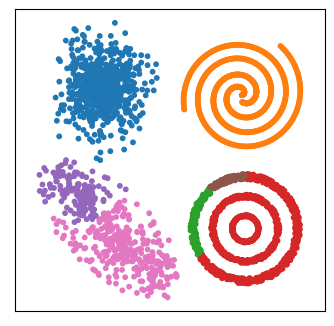

f1       ARI       ACC       NMI  cover_rate  classes
0  0.469214  0.620679  0.537969  0.769529         1.0      5.0

In [72]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(10, 2)
Y_pred = clu.membership
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/pydbc2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## DPA

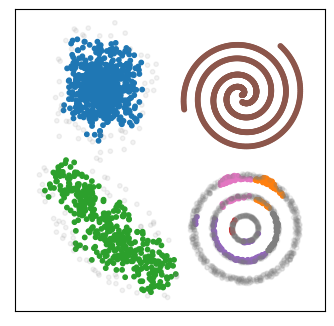

f1       ARI       ACC       NMI  cover_rate  classes
0  0.689665  0.803316  0.747621  0.856267    0.672323      7.0

In [73]:
from Pipeline import DPA

dpa = DPA.DensityPeakAdvanced(Z=3)
dpa.fit(X)

Y_pred = dpa.halos_
# Y_pred,Y_true=matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/DPA2.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# Circles

## raw

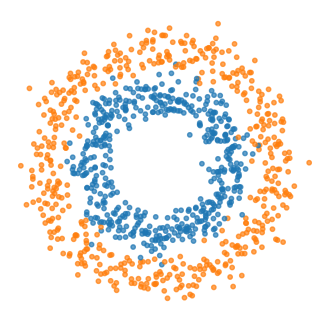

In [21]:
X_raw,Y_raw=DataLoader.load('circles')
X = X_raw
Y_true = Y_raw.values.astype(np.int)
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data3.png',dpi=100)

## Spectacl

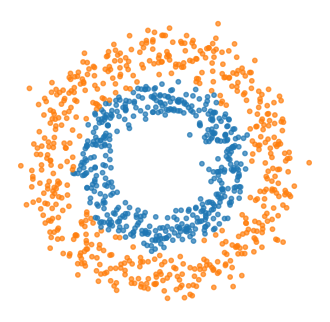

f1       ARI       ACC       NMI  cover_rate  classes
0  0.951965  0.817208  0.952048  0.752319         1.0      2.0

In [23]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=1).fit_predict(X)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## GIT

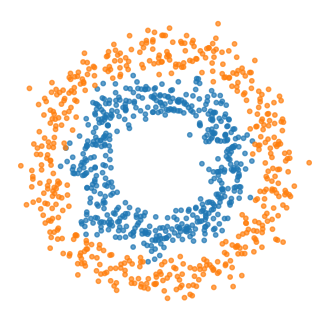

f1       ARI       ACC       NMI  cover_rate  classes
0  0.965027  0.864895  0.965035  0.785846         1.0      2.0

In [22]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=12,
                  target_ratio=[1, 1],
                  plot=False,
                 )

plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## QuickshiftPP

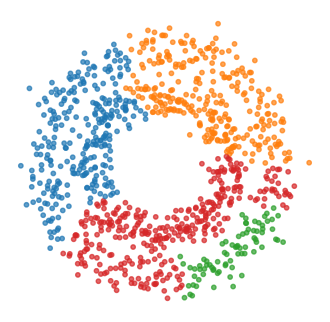

f1       ARI       ACC       NMI  cover_rate  classes
0  0.518984  0.031081  0.442557  0.026021         1.0      3.0

In [24]:
model = QuickshiftPP(k=15,beta=0.4)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## HDBSCAN

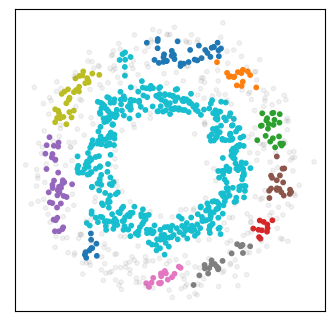

f1       ARI       ACC      NMI  cover_rate  classes
0  0.947155  0.860457  0.922727  0.76732    0.659341      3.0

In [80]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## KMeans

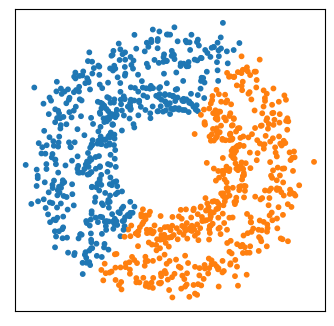

f1      ARI       ACC       NMI  cover_rate  classes
0  0.504495 -0.00092  0.504496  0.000058         1.0      2.0

In [81]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## SpectralClustering

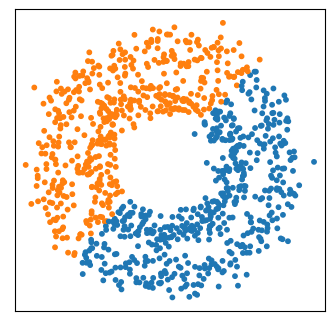

f1       ARI       ACC       NMI  cover_rate  classes
0  0.513262 -0.000271  0.513487  0.000525         1.0      2.0

In [82]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## pydpc

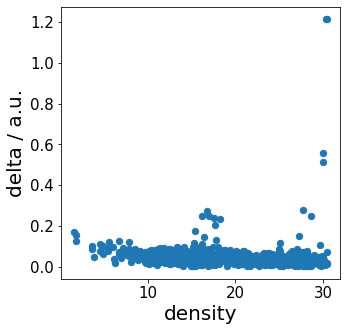

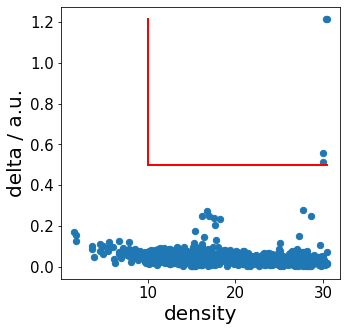

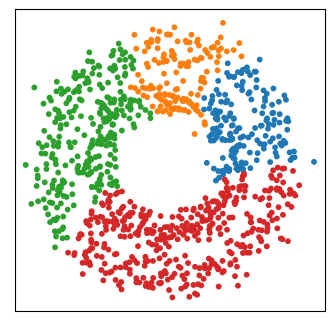

f1       ARI       ACC       NMI  cover_rate  classes
0  0.433062  0.000415  0.372627  0.001592         1.0      3.0

In [128]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(10, 0.5)
Y_pred = clu.membership
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/pydbc3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## DPA

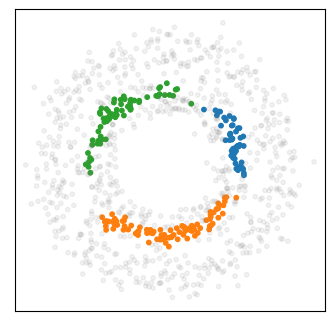

f1       ARI       ACC       NMI  cover_rate  classes
0  0.603997  0.000701  0.441176  0.007545    0.203796      3.0

In [84]:
from Pipeline import DPA

dpa = DPA.DensityPeakAdvanced(Z=0.6)
dpa.fit(X)

Y_pred = dpa.halos_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/DPA3.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# Moons

## raw

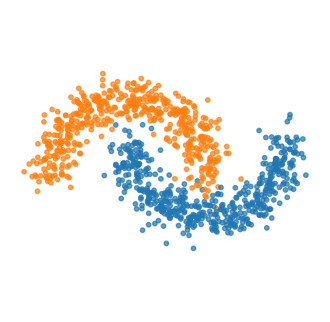

In [25]:
X_raw,Y_raw=DataLoader.load('moons')
X = X_raw
Y_true = Y_raw
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data4.png',dpi=100)

## Spectacl

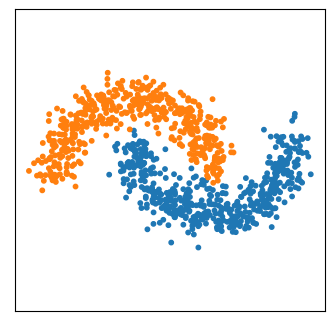

f1       ARI       ACC       NMI  cover_rate  classes
0  0.981016  0.925443  0.981019  0.869097         1.0      2.0

In [86]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=0.5).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## GIT

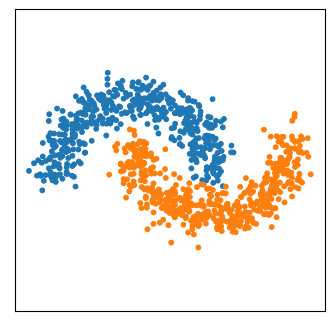

f1       ARI       ACC       NMI  cover_rate  classes
0  0.986013  0.944783  0.986014  0.895695         1.0      2.0

In [88]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=30,
                  target_ratio=[1, 1],
                  plot=False,
                 )
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## QuickshiftPP

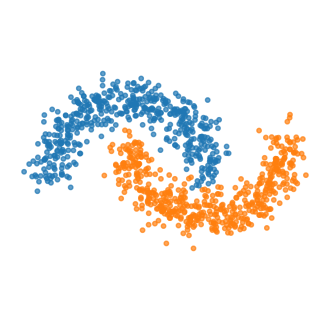

f1       ARI       ACC       NMI  cover_rate  classes
0  0.985015  0.940899  0.985015  0.888932         1.0      2.0

In [26]:
model = QuickshiftPP(k=16,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## HDBSCAN

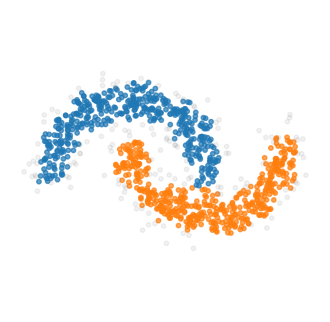

f1       ARI       ACC       NMI  cover_rate  classes
0  0.991926  0.967928  0.991926  0.935535    0.866134      2.0

In [27]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=11)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## KMeans

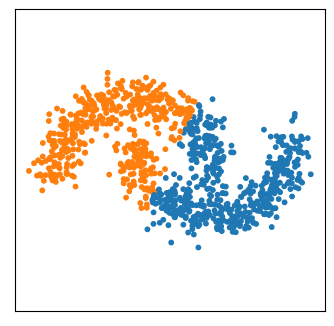

f1       ARI       ACC      NMI  cover_rate  classes
0  0.758176  0.266022  0.758242  0.20238         1.0      2.0

In [91]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## SpectralClustering

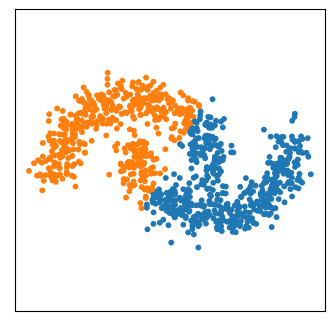

f1       ARI       ACC       NMI  cover_rate  classes
0  0.772192  0.295728  0.772228  0.226106         1.0      2.0

In [92]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## pydpc

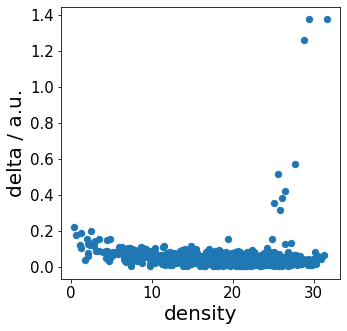

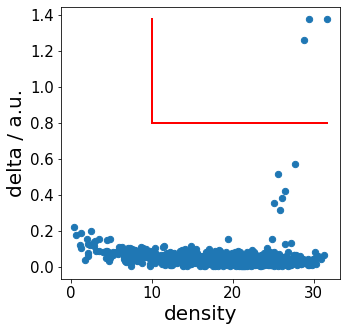

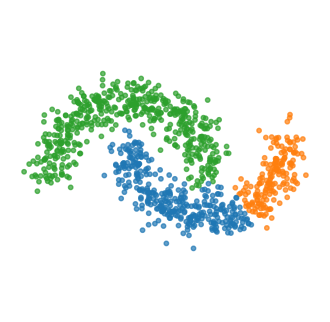

f1       ARI       ACC       NMI  cover_rate  classes
0  0.882557  0.729376  0.815185  0.726824         1.0      3.0

In [28]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(10, 0.8)
Y_pred = clu.membership
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/pydbc4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## DPA

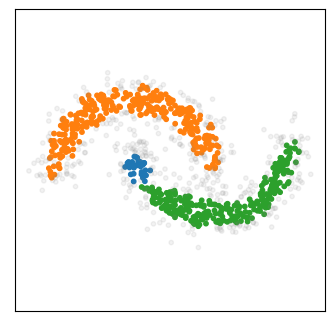

f1       ARI       ACC       NMI  cover_rate  classes
0  0.969791  0.900675  0.944356  0.877318    0.628372      3.0

In [94]:
from Pipeline import DPA

dpa = DPA.DensityPeakAdvanced(Z=2)
dpa.fit(X)

Y_pred = dpa.halos_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/DPA4.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# S-set

## raw

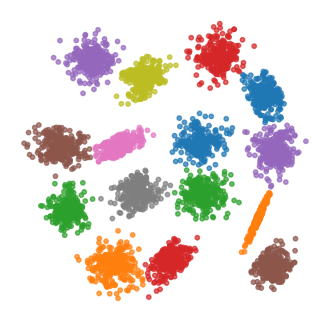

In [33]:
X_raw,Y_raw=DataLoader.load('s-set')
X = X_raw
Y_true = Y_raw
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data5.png',dpi=100)

## Spectacl

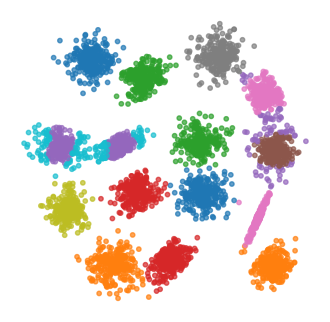

f1      ARI     ACC       NMI  cover_rate  classes
0  0.849762  0.85712  0.8658  0.938811         1.0     15.0

In [36]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=15, epsilon=1e5).fit_predict(X)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## GIT

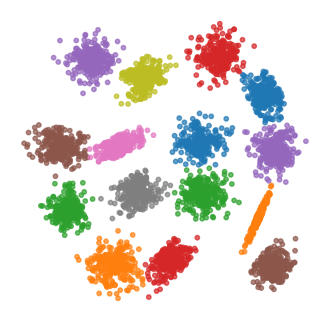

f1       ARI    ACC       NMI  cover_rate  classes
0  0.999  0.997877  0.999  0.997692         1.0     15.0

In [34]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=15,
                  target_ratio=[1 for i in range(15)],
                  plot=False,
                 )

Y_pred,Y_true=matchY(Y_pred,Y_true)
Y_pred = Y_pred+1
Y_pred[Y_pred==1]=0
Y_pred[Y_pred==2]=1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT5.png',dpi=100)
# Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## QuickshiftPP

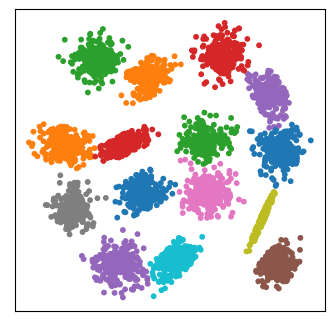

f1       ARI     ACC       NMI  cover_rate  classes
0  0.9978  0.995374  0.9978  0.995317         1.0     15.0

In [98]:
model = QuickshiftPP(k=15,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## HDBSCAN

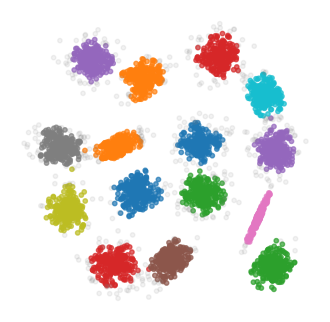

f1       ARI       ACC       NMI  cover_rate  classes
0  0.999139  0.998147  0.999139  0.997855      0.9292     15.0

In [35]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=30)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## KMeans

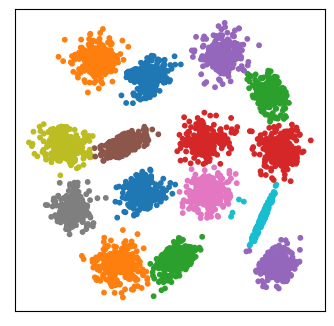

f1       ARI     ACC       NMI  cover_rate  classes
0  0.997603  0.994963  0.9976  0.994696         1.0     15.0

In [100]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## SpectralClustering

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



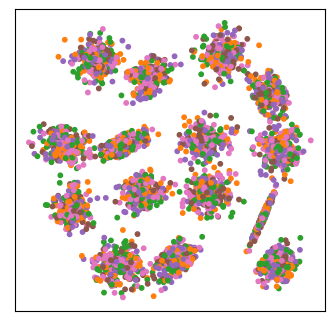

f1       ARI     ACC      NMI  cover_rate  classes
0  0.041621 -0.000112  0.0808  0.00287         1.0      7.0

In [101]:
clustering = SpectralClustering(n_clusters=15,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## pydpc

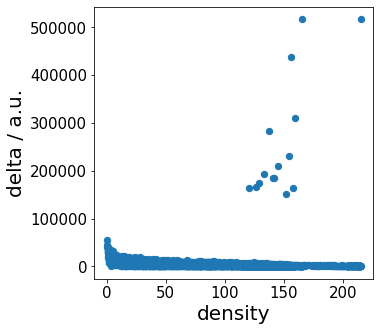

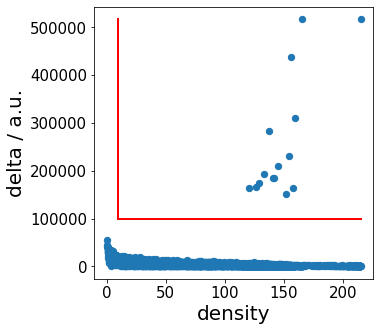

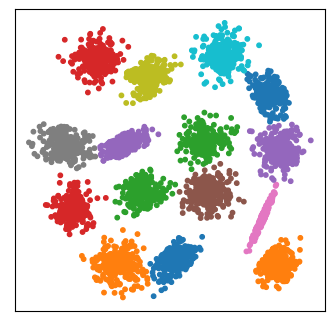

f1       ARI     ACC       NMI  cover_rate  classes
0  0.9986  0.997051  0.9986  0.996692         1.0     15.0

In [102]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(10, 100000)
Y_pred = clu.membership
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/pydbc5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## DPA

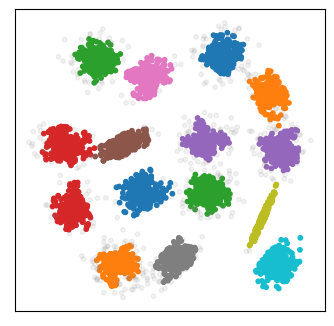

f1       ARI       ACC       NMI  cover_rate  classes
0  0.999142  0.998146  0.999142  0.997969      0.9326     15.0

In [103]:
from Pipeline import DPA

dpa = DPA.DensityPeakAdvanced(Z=6)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true=matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/DPA5.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# Smile

## raw

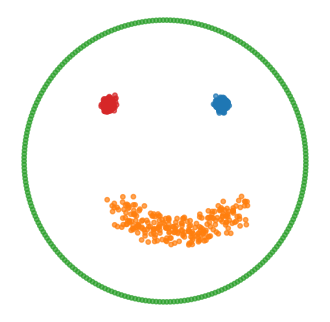

In [37]:
X_raw,Y_raw=DataLoader.load('smile')
X = X_raw
Y_true = Y_raw
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data6.png',dpi=100)

## Spectacl

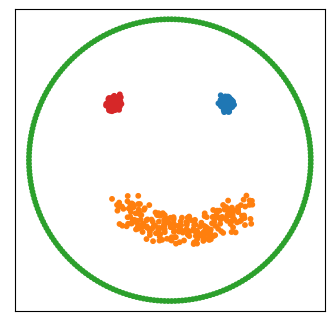

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      4.0

In [105]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=4, epsilon=0.1).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## GIT

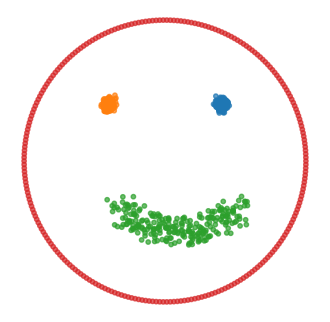

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      4.0

In [38]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=10,
                  target_ratio=[1, 1, 1, 1],
                  plot=False,
                 )
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## QuickshiftPP

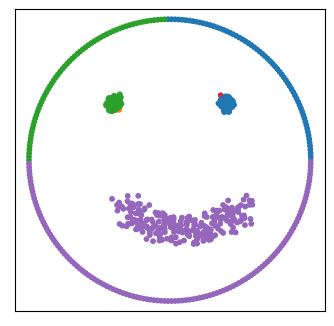

f1       ARI       ACC       NMI  cover_rate  classes
0  0.643799  0.604617  0.748252  0.669204         1.0      4.0

In [169]:
model = QuickshiftPP(k=15,beta=0.5)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## HDBSCAN

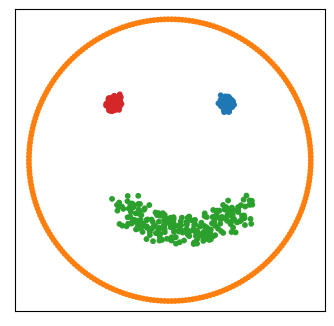

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      4.0

In [108]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## KMeans

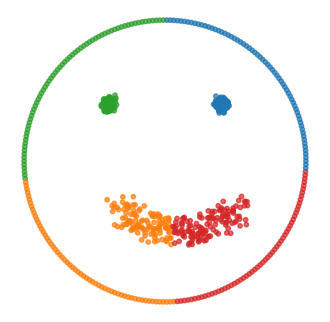

f1       ARI       ACC       NMI  cover_rate  classes
0  0.665884  0.547445  0.696304  0.608171         1.0      4.0

In [40]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## SpectralClustering

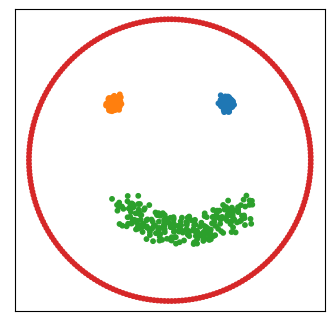

f1  ARI  ACC  NMI  cover_rate  classes
0  1.0  1.0  1.0  1.0         1.0      4.0

In [178]:
clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=0,
        gamma=1000,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## pydpc

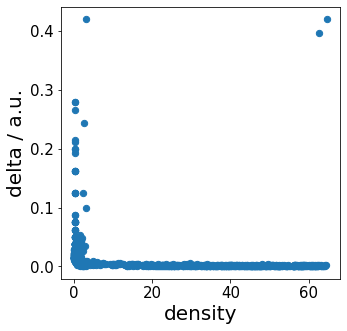

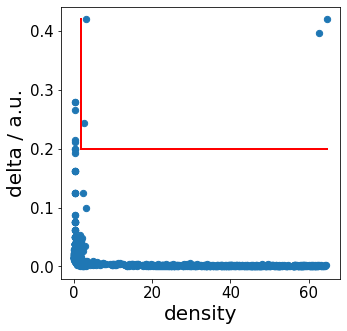

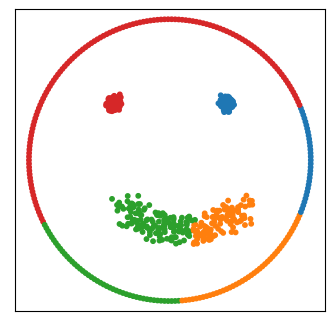

f1       ARI       ACC       NMI  cover_rate  classes
0  0.650345  0.553446  0.685315  0.626577         1.0      4.0

In [111]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(2, 0.2)
Y_pred = clu.membership
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/pydbc6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## DPA

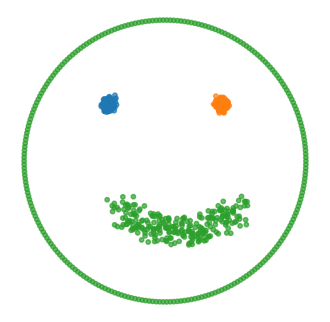

f1       ARI      ACC       NMI  cover_rate  classes
0  0.667  0.714162  0.75025  0.857306         1.0      3.0

In [39]:
from Pipeline import DPA

dpa = DPA.DensityPeakAdvanced(Z=1)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true=matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/DPA6.png',dpi=100)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# pipeline

In [14]:
def show_topo_graph(V,E,X=None,fileroot=None,fileidx=1000,with_labels=False,svfile=None,dpi=80,node_size =50):
    node2custer = { v:i for i,v in enumerate(V.keys()) }
    plt.figure(figsize=(8, 8),dpi = dpi)
    G = nx.Graph()
    G.add_nodes_from( [node2custer[k] for k in V.keys()] )
    for e in E:
        if E[e]>0:
            G.add_edge( node2custer[e[0]],node2custer[e[1]],weight=E[e])
    if -1 in G.nodes():
        G.remove_node(-1)
    pos={}
    if X is None:
        pos = nx.kamada_kawai_layout(G)
    else:
        for i in V.keys():
            pos[node2custer[i]]=X[V[i]].mean(axis=0)*3

    nx.draw_networkx(G,pos,with_labels=with_labels,node_size =node_size)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels={key:'{:.2f}'.format(val*100) for key,val in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.axis('equal')

    if fileroot:
        for i in range(5):
            plt.savefig(Path(fileroot.format(fileidx+i)))

    if svfile is not None:
        plt.savefig(svfile,bbox_inches = 'tight',pad_inches = 0.01)

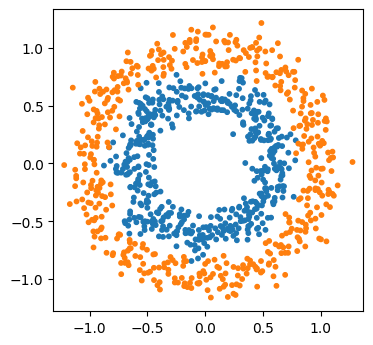

f1       ARI       ACC       NMI  cover_rate  classes
0  0.965027  0.864895  0.965035  0.785846         1.0      2.0

In [17]:
Y_pred,V,E_raw,E_final,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=12,
                  target_ratio=[1, 1],
                  plot=False,
                 )

plot_tools.autoPlot(X,Y_pred,axis='on',svfile='./figs/GIT3.png',dpi=100,alpha=1.0)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

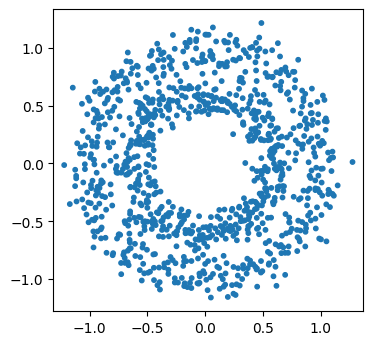

In [6]:
plot_tools.autoPlot(X,np.zeros(X_extend.shape[0]).astype(np.int),svfile='./figs/GIT3_raw.png',dpi=100,alpha=1.0)

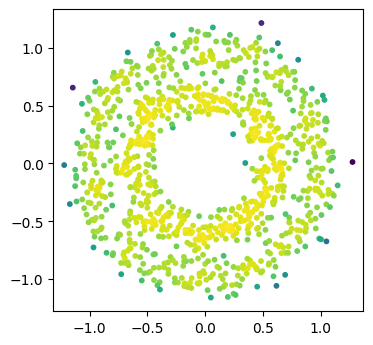

In [7]:
plot_tools.autoPlot(X,y=X_extend[:, -4],continues=True,svfile='./figs/GIT3_density.png',dpi=100,alpha=1.0)

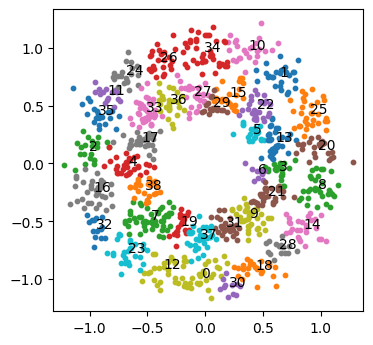

In [9]:
plot_tools.PaperGraph.show_local_clusters(X,V,seed=2020,svfile='./figs/GIT3_local_clusters.png',dpi=100)

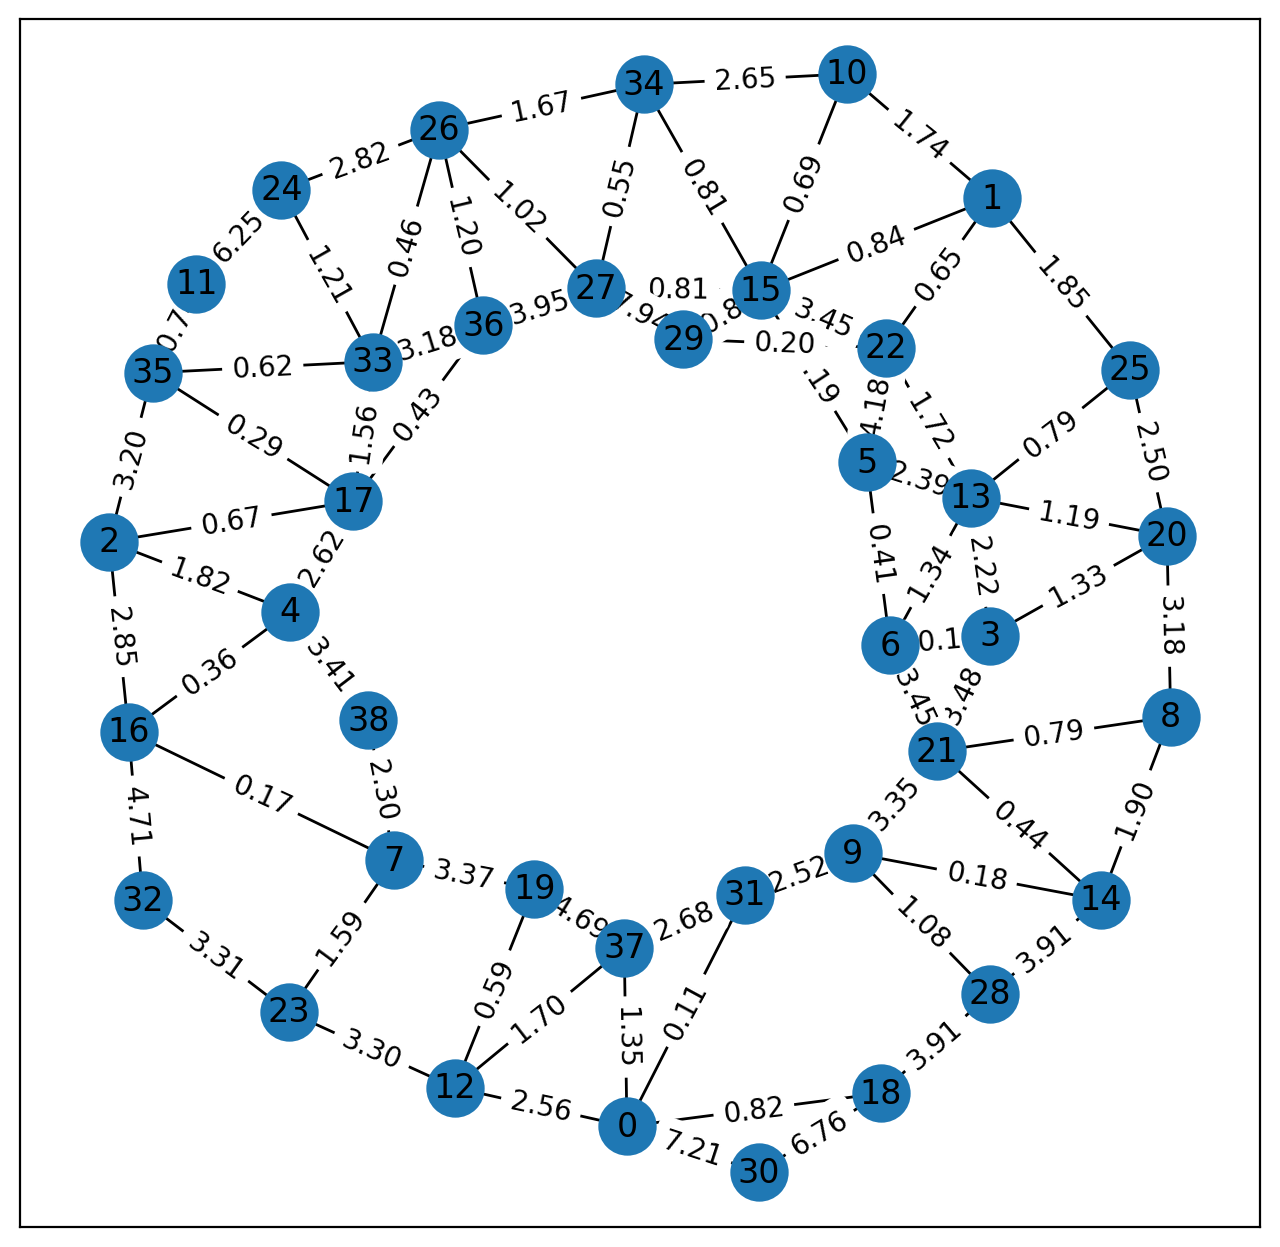

In [15]:
show_topo_graph(V,E_raw,X,with_labels=True,svfile='./figs/GIT3_local_topo.png',dpi=200,node_size=400)

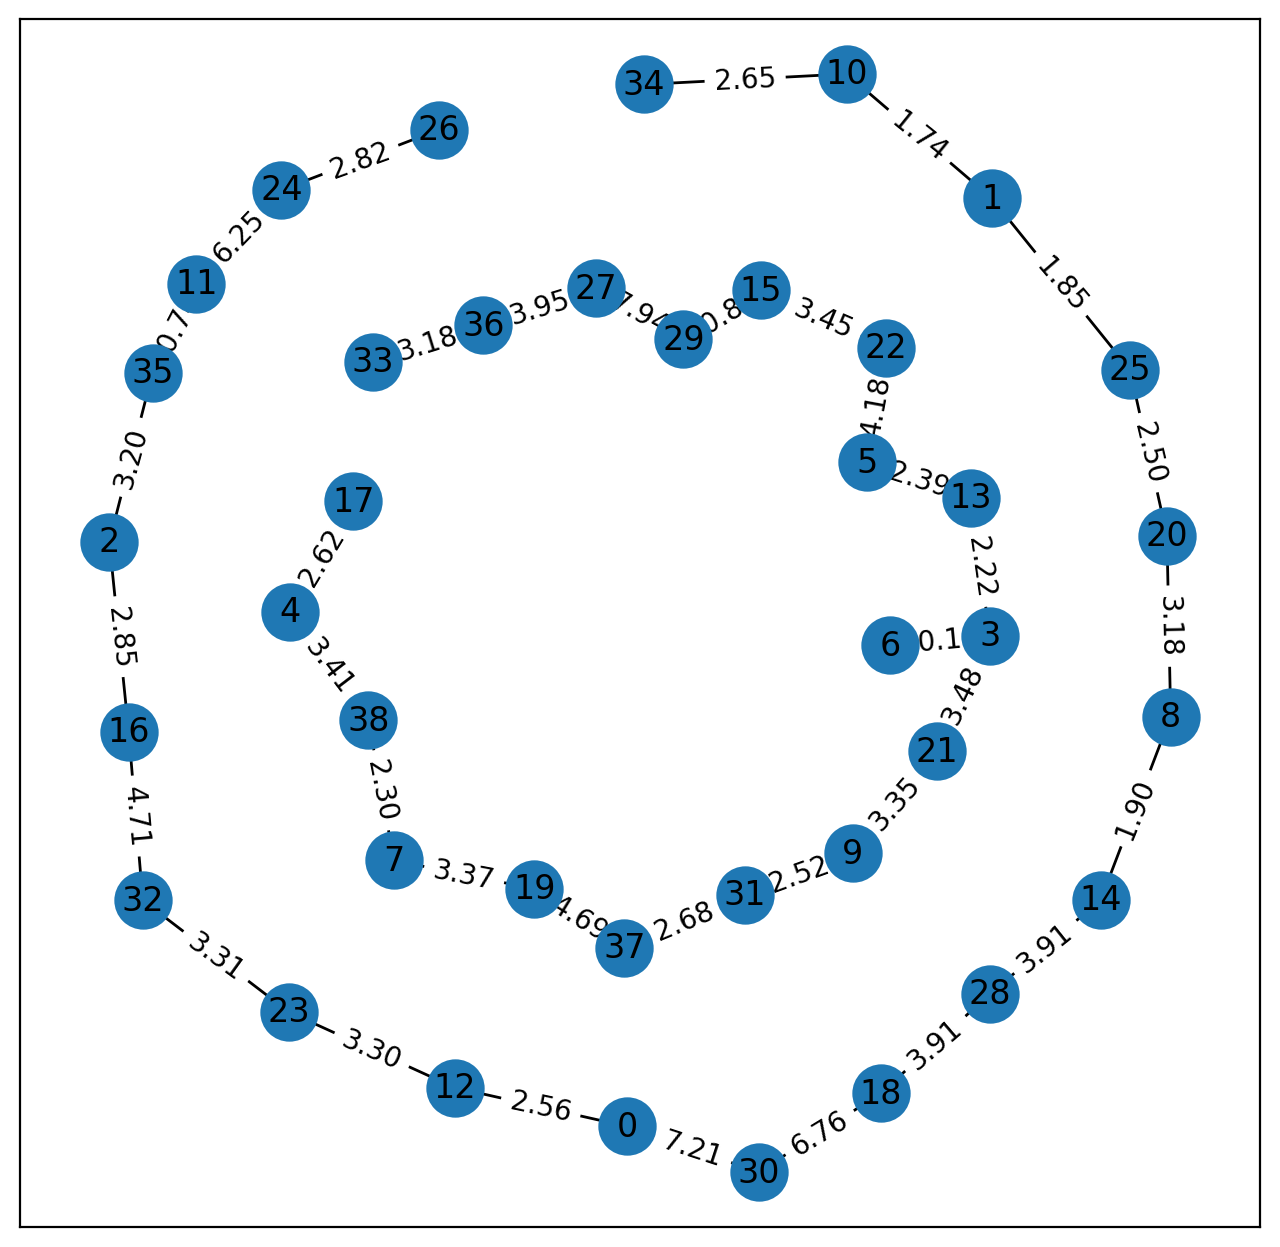

In [16]:
show_topo_graph(V,E_final,X,with_labels=True,svfile='./figs/GIT3_final_topo.png',dpi=200,node_size=400)